In [127]:
import numpy as np
import pandas as pd

from sklearn import datasets

import matplotlib.pyplot as plt
%matplotlib inline

In [128]:
iris = datasets.load_iris()
print('Features:     ', iris.feature_names)    # .features shows the name columns
print('Target names: ', iris.target_names)     # .target_names show the labels
print('Targets:      ', iris.target)           # .target is a vector of integers (0,1,2,...) associated with target_names

Features:      ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names:  ['setosa' 'versicolor' 'virginica']
Targets:       [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [129]:
# create dataframe
irisdf = pd.DataFrame(iris.data, columns=iris.feature_names)
irisdf.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [248]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Get dataset with sepal attributes
Xsepal, ysepal = irisdf[['sepal length (cm)','sepal width (cm)']], iris.target

# Get dataset with petal attributes
Xpetal, ypetal = irisdf[['petal length (cm)','petal width (cm)']], iris.target

# Split the dataset into a training and a testing set
# Test set will be the 20% taken randomly
Xtrainsepal, Xtestsepal, ytrainsepal, ytestsepal = train_test_split(Xsepal, ysepal, test_size=0.2, random_state=33)
Xtrainpetal, Xtestpetal, ytrainpetal, ytestpetal = train_test_split(Xpetal, ypetal, test_size=0.2, random_state=33)
#print(Xtrain.shape, ytrain.shape)

# Standardize the features (feature scaling) 
# For each feature, calculate the average, subtract the mean value from the feature value, 
# and divide the result by their standard deviation. After scaling, each feature will have 
# a zero average, with a standard deviation of one.
#scaler = StandardScaler()  
#Xtrainsepal = scaler.fit_transform(Xtrainsepal)
#Xtrainpetal = scaler.fit_transform(Xtrainpetal)

scaler = preprocessing.StandardScaler().fit(Xtrainsepal)
Xtrainsepal = scaler.transform(Xtrainsepal)
Xtestsepal  = scaler.transform(Xtestsepal)

scaler = preprocessing.StandardScaler().fit(Xtrainpetal)
Xtrainpetal = scaler.transform(Xtrainpetal)
Xtestpetal  = scaler.transform(Xtestpetal)



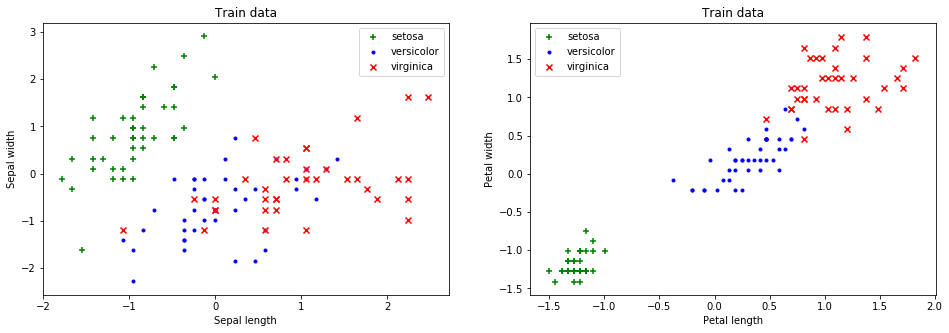

In [131]:
import matplotlib.pyplot as plt

colors  = ['green', 'blue', 'red']
markers = ['+','.','x']

fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

def plot_data(ax,data,target,colors,markers,xlabel,ylabel,title):
    for i in range(0,3):
        xs = data[:, 0][target == i]
        ys = data[:, 1][target == i]
        ax.scatter(xs, ys, c=colors[i],marker=markers[i])
        ax.legend(iris.target_names)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_title(title)
    #endfor
#endfunction

plot_data(ax1,Xtrainsepal,ytrainsepal,colors,markers,'Sepal length','Sepal width','Train data')
plot_data(ax2,Xtrainpetal,ytrainpetal,colors,markers,'Petal length','Petal width','Train data')

In [134]:
from sklearn.svm import SVC

clf_sepal = SVC(kernel='linear', decision_function_shape='ovo', gamma='auto')
clf_sepal.fit(Xtrainsepal, ytrainsepal)

print(clf_sepal.intercept_)
print(clf_sepal.coef_)

clf_petal = SVC(kernel='linear', decision_function_shape='ovo', gamma='auto')
clf_petal.fit(Xtrainpetal, ytrainpetal)

print(clf_petal.intercept_)
print(clf_petal.coef_)

[-1.36426346 -0.51170395  0.65216902]
[[-2.36453776  1.54198189]
 [-1.69175214  0.92499315]
 [-1.25285724 -0.34293477]]
[-1.52688112 -0.2432579   2.9126248 ]
[[-1.36481844 -1.15445442]
 [-0.67830752 -0.60807513]
 [-1.74127095 -2.41298495]]


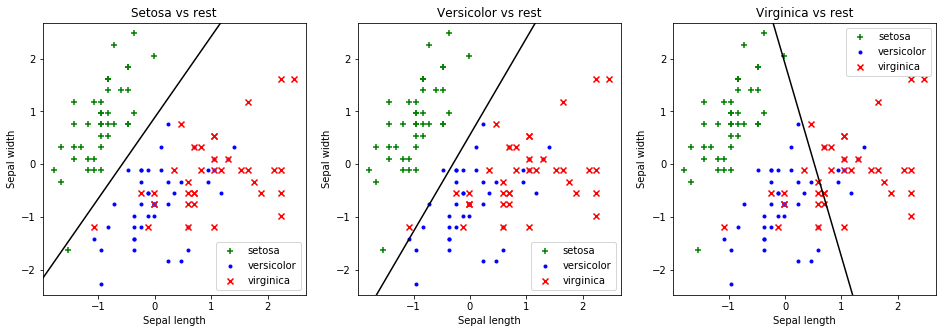

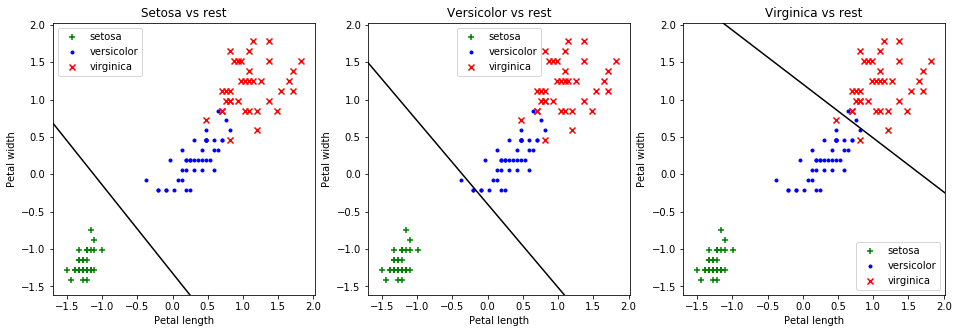

In [135]:
def plot_hyperplane(ax, clf, data, svmline):
    eps = 0.2
    # get the separating hyperplane
    w = clf.coef_[svmline]
    a = -w[0] / w[1]
    xx = np.linspace(data[:,0].min()-eps , data[:,0].max()+eps) 
    yy = a * xx - (clf.intercept_[svmline]) / w[1]
    ax.plot(xx, yy,'-k') 
    ax.set_xlim( [data[:,0].min()-eps, data[:,0].max()+eps] )
    ax.set_ylim( [data[:,1].min()-eps, data[:,0].max()+eps] )
    plt.show
#endfunction

# plot all data together according to the type of flower 
fig    = plt.figure(figsize=(16,5))
titles = ['Setosa vs rest', 'Versicolor vs rest', 'Virginica vs rest']
axis   = [fig.add_subplot(131), fig.add_subplot(132), fig.add_subplot(133)]
for i in range(0,3):
    plot_data(axis[i],Xtrainsepal,ytrainsepal,colors,markers,'Sepal length','Sepal width',titles[i])
    plot_hyperplane(axis[i],clf_sepal,Xtrainsepal,i)
#endfor



# plot all data together according to the type of flower 
fig    = plt.figure(figsize=(16,5))
titles = ['Setosa vs rest', 'Versicolor vs rest', 'Virginica vs rest']
axis   = [fig.add_subplot(131), fig.add_subplot(132), fig.add_subplot(133)]
for i in range(0,3):
    plot_data(axis[i],Xtrainpetal,ytrainpetal,colors,markers,'Petal length','Petal width',titles[i])
    plot_hyperplane(axis[i],clf_petal,Xtrainpetal,i)
#endfor

In [125]:
clf_sepal.predict(scaler.fit_transform([[4.7, 2.1]]))

array([1])

In [226]:
# test
iris = datasets.load_iris()
irisdf = pd.DataFrame(iris.data, columns=iris.feature_names)
irisdf['target'] = iris.target

# using 2 classes 0,1

# setosa, virginica = 0, versicolor = 1
irisdf.loc[irisdf.target != 1, 'target'] = 0

#irisdf['flower_name'] = irisdf.target.apply(lambda x: iris.target_names[x])
#setosa = irisdf[0:50]
#versic = irisdf[50:100]
#virgin = irisdf[100:]

# merge setosa and virgin
#setosa.target = [0]*len(setosa.index)
#virgin.target = [0]*len(virgin.index) 
#irisdf = setosa.append(versic).append(virgin)
#irisdf[48:103]

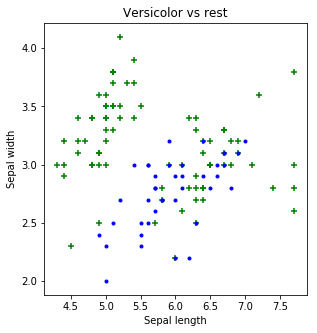

In [252]:
X = irisdf[['sepal length (cm)', 'sepal width (cm)']]
y = np.asarray(irisdf.target)  #iris.target
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2) #, random_state=33)

def plot_data_2classes(ax,data,target,col1,col2,colors,markers,xlabel,ylabel,title):
    for i in range(0,3):
        xs = data[col1].iloc[target == i]
        ys = data[col2].iloc[target == i]
        ax.scatter(xs, ys, c=colors[i],marker=markers[i])
        #ax.legend(iris.target_names)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_title(title)
    #endfor
#endfunction

fig    = plt.figure(figsize=(16,5))

# plot all data together according to the type of flower fig    = plt.figure(figsize=(16,5))
titles = ['Versicolor vs rest'] #, 'Virginica vs rest']
axis   = [fig.add_subplot(131)] #, fig.add_subplot(132), fig.add_subplot(133)]
#cols   = [, 'sepal width (cm)']
for i in range(0,1):
    plot_data_2classes(axis[i],Xtrain,ytrain,'sepal length (cm)','sepal width (cm)',colors,markers,'Sepal length','Sepal width',titles[i])
#endfunction


In [253]:
model=SVC(gamma='auto',kernel='linear')
model.fit(Xtrain, ytrain)
print(model.coef_)

[[ 2.44868982e-06 -2.22254404e+00]]


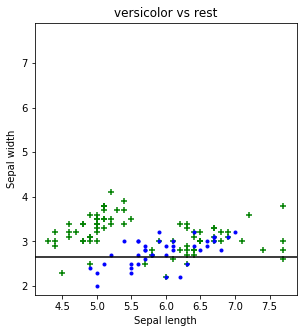

In [255]:
# plot all data together according to the type of flower 
def plot_hyperplane(ax, clf, data, svmline):
    eps = 0.2
    # get the separating hyperplane
    w = clf.coef_[svmline]
    a = -w[0] / w[1]
    xx = np.linspace(data[:,0].min()-eps , data[:,0].max()+eps) 
    yy = a * xx - (clf.intercept_[svmline]) / w[1]
    ax.plot(xx, yy,'-k') 
    ax.set_xlim( [data[:,0].min()-eps, data[:,0].max()+eps] )
    ax.set_ylim( [data[:,1].min()-eps, data[:,0].max()+eps] )
    plt.show
#endfunction

fig    = plt.figure(figsize=(16,5))
titles = ['versicolor vs rest'] #['Setosa vs rest', 'Versicolor vs rest', 'Virginica vs rest']
axis   = [fig.add_subplot(131)] #, fig.add_subplot(132), fig.add_subplot(133)]
for i in range(0,1):
    plot_data_2classes(axis[i],Xtrain,ytrain,'sepal length (cm)','sepal width (cm)',colors,markers,'Sepal length','Sepal width',titles[i])
#    plot_data_2clase(axis[i],Xtrainsepal,ytrainsepal,colors,markers,'Sepal length','Sepal width',titles[i])
    #Xtraindrop = Xtrain.drop(['target'], axis='columns')
    Xtrain = np.asarray(Xtrain)
    plot_hyperplane(axis[i],model,Xtrain,i)
#endfor

In [243]:
Xtraindrop = Xtrain.drop(['target'], axis='columns')
np.asarray(Xtraindrop) #.as_array

array([[5. , 3. , 1.6, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [6.5, 3. , 5.2, 2. ],
       [7.2, 3.2, 6. , 1.8],
       [6.2, 2.2, 4.5, 1.5],
       [4.8, 3. , 1.4, 0.1],
       [6.9, 3.1, 5.4, 2.1],
       [5.8, 2.7, 4.1, 1. ],
       [6.9, 3.2, 5.7, 2.3],
       [5.4, 3. , 4.5, 1.5],
       [5.2, 2.7, 3.9, 1.4],
       [5. , 3.5, 1.3, 0.3],
       [6.9, 3.1, 5.1, 2.3],
       [5.7, 2.5, 5. , 2. ],
       [5.9, 3. , 5.1, 1.8],
       [5.8, 2.6, 4. , 1.2],
       [6.4, 2.7, 5.3, 1.9],
       [5. , 3.3, 1.4, 0.2],
       [5.7, 2.8, 4.5, 1.3],
       [5.5, 4.2, 1.4, 0.2],
       [7.4, 2.8, 6.1, 1.9],
       [6.5, 3. , 5.5, 1.8],
       [6.5, 2.8, 4.6, 1.5],
       [5. , 3.4, 1.6, 0.4],
       [4.8, 3.4, 1.6, 0.2],
       [6.2, 3.4, 5.4, 2.3],
       [5.6, 2.7, 4.2, 1.3],
       [6.3, 2.5, 5. , 1.9],
       [6. , 2.2, 4. , 1. ],
       [6.3, 2.5, 4.9, 1.5],
       [5. , 3.2, 1.2, 0.2],
       [6.7, 3. , 5. , 1.7],
       [6.9, 3.1, 4.9, 1.5],
       [4.4, 2.9, 1.4, 0.2],
       [6.7, 3

In [112]:
# now using all information from the iris data set 
# Separating the independent variables from dependent variables

# Get dataset with petal attributes
X = irisdf
y = iris.target

# Split the dataset into a training and a testing set
# Test set will be the 20% taken randomly
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2) #, random_state=33)
#print(Xtrain, ytrain)

# Standardize the features (feature scaling) 
# For each feature, calculate the average, subtract the mean value from the feature value, 
# and divide the result by their standard deviation. After scaling, each feature will have 
# a zero average, with a standard deviation of one.
#scaler = StandardScaler()  
#Xtrain = scaler.fit_transform(Xtrain)

#print(Xtrain)

In [113]:
clf = SVC(kernel='linear')# , decision_function_shape='ovr', gamma='auto')
clf.fit(Xtrain,ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [114]:
# Testing unsing the test set
pred = clf.predict(Xtest)

In [115]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(ytest,pred))

[[12  0  0]
 [ 0  9  0]
 [ 0  0  9]]


In [116]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         9

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

